# Trabalho ECDB

## Grupo 2


## Alunos: 

- Bruno Sá (Pg48932)
- Gonçalo Cardoso (Pg49034)
- Joana Gonçalves (Pg49835)
- Luís Ferreira (Pg49840)



# CYP P450 2C9 Inhibition_ Information

## Dataset Description: 

The CYP P450 genes are involved in the formation and breakdown (metabolism) of various molecules and chemicals within cells. Specifically, the CYP P450 2C9 plays a major role in the oxidation of both xenobiotic and endogenous compounds.

## Task Description: 

Binary Classification. Given a drug SMILES string, predict CYP2C9 inhibition.

## Dataset Statistics: 

11,934 drugs.

## References:

[1] Veith, Henrike et al. “Comprehensive characterization of cytochrome P450 isozyme selectivity across chemical libraries.” Nature biotechnology vol. 27,11 (2009): 1050-5.


Tópicos (apagar depois):

-análise do conjunto de dados e sua breve descrição
- tarefas de pré-processamento dos dados (as que julgar necessárias)
- sumarização dos dados (estatística descritiva, exploração com recurso
a gráficos)
- análise estatística univariada (e.g. análise de “expressão” diferencial)
- análise estatística multivariada (não supervisionada): clustering,
redução de dimensionalidade/ visualização

In [1]:
#Librarys
import scipy.stats as stats
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, chisquare
from sklearn.preprocessing import StandardScaler

# 1. Importação dos dados e a sua Visualização

In [2]:
df_cyp2c9 = pd.read_csv("cyp2c9.csv")

In [3]:
df_features = pd.read_csv("cyp2c9_features.csv")

In [121]:
df_cyp2c9

,ids,smiles,Y
0,1960010.0,CCN1C(=O)/C(=C2\SC(=S)N(CCCOC)C2=O)c2ccccc21,1
1,644851.0,Clc1ccccc1-c1nc(-c2ccccc2)n[nH]1,1
2,644890.0,COc1ccccc1C(c1nnnn1C(C)(C)C)N1CCN(Cc2ccncc2)CC1,1
3,644968.0,COc1ccccc1CNC(=O)Cn1nnc(-c2ccncc2)n1,1
4,645164.0,CCC(c1nnnn1CC1CCCO1)N(CCN1CCOCC1)Cc1cc2cc(C)cc...,0
...,...,...,...
11929,16758814.0,CCN1C(=O)[C@@H]2[C@@H](CC[C@@H]3C(=O)C=C[C@@H]...,0
11930,16758815.0,C=CC1=C[C@@H](O)[C@@H]2O[C@@H]2C12OCCCO2,0
11931,16758816.0,O=C1[C@H]2CC=C3[C@@H]([C@H](O)[C@H]4O[C@@H]4C3...,0
11932,16758818.0,C[C@H](c1ccccc1)N1C(=O)[C@@H]2[C@@H](CC[C@@H]3...,0


In [122]:
df_features


,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,12.820479,-0.183140,12.820479,0.128619,0.457873,362.476,344.332,362.07590,126.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,6.126257,0.660427,6.126257,0.660427,0.756902,255.708,245.628,255.05632,88.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.719940,-0.219974,5.719940,0.075509,0.605920,421.549,390.301,421.25900,164.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,12.040634,-0.208718,12.040634,0.006714,0.728361,324.344,308.216,324.13348,122.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,13.082813,-0.044883,13.082813,0.018472,0.457249,495.628,458.332,495.29578,194.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,12.346902,-0.801800,12.346902,0.024123,0.682518,263.293,246.157,263.11575,102.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11930,9.674588,-0.801690,9.674588,0.174259,0.635371,210.229,196.117,210.08920,82.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11931,13.390758,-1.019880,13.390758,0.162294,0.455270,397.427,374.243,397.15253,152.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11932,13.179767,-1.161112,13.179767,0.077392,0.772281,357.406,334.222,357.15762,138.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 1.1 - Concatenção dos dataframes

In [4]:
df = pd.concat([df_cyp2c9, df_features], axis=1)
df

,ids,smiles,Y,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1960010.0,CCN1C(=O)/C(=C2\SC(=S)N(CCCOC)C2=O)c2ccccc21,1,12.820479,-0.183140,12.820479,0.128619,0.457873,362.476,344.332,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,644851.0,Clc1ccccc1-c1nc(-c2ccccc2)n[nH]1,1,6.126257,0.660427,6.126257,0.660427,0.756902,255.708,245.628,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,644890.0,COc1ccccc1C(c1nnnn1C(C)(C)C)N1CCN(Cc2ccncc2)CC1,1,5.719940,-0.219974,5.719940,0.075509,0.605920,421.549,390.301,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,644968.0,COc1ccccc1CNC(=O)Cn1nnc(-c2ccncc2)n1,1,12.040634,-0.208718,12.040634,0.006714,0.728361,324.344,308.216,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,645164.0,CCC(c1nnnn1CC1CCCO1)N(CCN1CCOCC1)Cc1cc2cc(C)cc...,0,13.082813,-0.044883,13.082813,0.018472,0.457249,495.628,458.332,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,16758814.0,CCN1C(=O)[C@@H]2[C@@H](CC[C@@H]3C(=O)C=C[C@@H]...,0,12.346902,-0.801800,12.346902,0.024123,0.682518,263.293,246.157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11930,16758815.0,C=CC1=C[C@@H](O)[C@@H]2O[C@@H]2C12OCCCO2,0,9.674588,-0.801690,9.674588,0.174259,0.635371,210.229,196.117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11931,16758816.0,O=C1[C@H]2CC=C3[C@@H]([C@H](O)[C@H]4O[C@@H]4C3...,0,13.390758,-1.019880,13.390758,0.162294,0.455270,397.427,374.243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11932,16758818.0,C[C@H](c1ccccc1)N1C(=O)[C@@H]2[C@@H](CC[C@@H]3...,0,13.179767,-1.161112,13.179767,0.077392,0.772281,357.406,334.222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Informações sobre os  dados:

### 2.1. Análise Descritiva:

O conjunto de dados a ser analisados representa uma coleção de compostos químicos, cada um representado por um ID único, uma string SMILES (uma representação compacta da estrutura molecular) e várias propriedades e características da molécula. Essas propriedades incluem descritores numéricos da estrutura molecular, como MaxEStateIndex, MinEStateIndex, MaxAbsEStateIndex e MinAbsEStateIndex, bem como a presença ou ausência de várias subestruturas moleculares, como fr_sulfide, fr_sulfonamd e fr_sulfone. A coluna Y é uma variável binária que indica se a molécula inibe (valor 1) ou não (valor 0) a enzima cyp2c9 .

2.1.1 - Análise dos metadados

In [124]:
# Ver as dimensões do DataFrame

print("Dimensões:", df_cyp2c9.shape)

Dimensões: (11934, 3)


In [125]:
# Ver as primeiras linhas do DataFrame

print(df_cyp2c9.head())

         ids                                             smiles  Y
0  1960010.0       CCN1C(=O)/C(=C2\SC(=S)N(CCCOC)C2=O)c2ccccc21  1
1   644851.0                   Clc1ccccc1-c1nc(-c2ccccc2)n[nH]1  1
2   644890.0    COc1ccccc1C(c1nnnn1C(C)(C)C)N1CCN(Cc2ccncc2)CC1  1
3   644968.0               COc1ccccc1CNC(=O)Cn1nnc(-c2ccncc2)n1  1
4   645164.0  CCC(c1nnnn1CC1CCCO1)N(CCN1CCOCC1)Cc1cc2cc(C)cc...  0


In [126]:
# Ver os tipos de dados de cada coluna

print(df_cyp2c9.dtypes)

ids       float64
smiles     object
Y           int64
dtype: object


In [127]:
# Ver o número de valores únicos em cada coluna

print(df_cyp2c9.nunique())

ids       11934
smiles    11934
Y             2
dtype: int64


In [128]:
# Ver a quantidade de valores ausentes em cada coluna

df_cyp2c9.isnull().sum()



ids       0
smiles    0
Y         0
dtype: int64


- Vimos também que não há valores omissos nem valores duplicados no dataframe  " df_cyp2c9 " pelo que este tipo de pré-processamento pode ser ultrapassado.

2.1.2 - Análise do dados:

In [129]:
# Ver as dimensões do DataFrame
print("Dimensões: ", df_features.shape)

Dimensões:  (11934, 208)


In [130]:
# Ver as primeiras linhas do DataFrame
print(df_features.head())

   MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
0       12.820479       -0.183140          12.820479           0.128619   
1        6.126257        0.660427           6.126257           0.660427   
2        5.719940       -0.219974           5.719940           0.075509   
3       12.040634       -0.208718          12.040634           0.006714   
4       13.082813       -0.044883          13.082813           0.018472   

        qed    MolWt  HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  \
0  0.457873  362.476         344.332   362.07590                126.0   
1  0.756902  255.708         245.628   255.05632                 88.0   
2  0.605920  421.549         390.301   421.25900                164.0   
3  0.728361  324.344         308.216   324.13348                122.0   
4  0.457249  495.628         458.332   495.29578                194.0   

   NumRadicalElectrons  ...  fr_sulfide  fr_sulfonamd  fr_sulfone  \
0                  0.0  ...         1.0  

In [131]:
# Ver os tipos de dados de cada coluna
print(df_features.dtypes)

MaxEStateIndex       float64
MinEStateIndex       float64
MaxAbsEStateIndex    float64
MinAbsEStateIndex    float64
qed                  float64
                      ...   
fr_thiazole          float64
fr_thiocyan          float64
fr_thiophene         float64
fr_unbrch_alkane     float64
fr_urea              float64
Length: 208, dtype: object


In [132]:
# Ver o número de valores únicos em cada coluna
print(df_features.nunique())

MaxEStateIndex       11574
MinEStateIndex       11439
MaxAbsEStateIndex    11574
MinAbsEStateIndex    11304
qed                  10876
                     ...  
fr_thiazole              4
fr_thiocyan              2
fr_thiophene             3
fr_unbrch_alkane        20
fr_urea                  5
Length: 208, dtype: int64


In [133]:
# Ver a quantidade de valores ausentes em cada coluna
print(df_features.isnull().sum())

MaxEStateIndex       0
MinEStateIndex       0
MaxAbsEStateIndex    0
MinAbsEStateIndex    0
qed                  0
                    ..
fr_thiazole          0
fr_thiocyan          0
fr_thiophene         0
fr_unbrch_alkane     0
fr_urea              0
Length: 208, dtype: int64


### Descrição das Features

Nas colunas do dataframe features estão representadas algumas propriedades dos compostos químicos que são avaliadas neste tipo de estudo, onde se pretende demonstrar se um composto tem capacidade de inibição de um certo gene.

A escolha das propriedades a ser analisadas vai ser baseada na sua possível importância biológica. 

As propriedades a ser analisadas são:

- BertzCT : Representa a complexidade estrutural.

- MaxAbsEStateIndex :  Pode ser usado para identificar o átomo mais doador ou retirador de eletrões no composto, o que pode ser importante para entender a reatividade ou atividade biológica do composto.

- MinAbsEStateIndex : Pode ser usado para identificar o átomo menos doador ou retirador de eletrões no composto, o que pode ser importante para entender a reatividade ou atividade biológica do composto.

- qed :  Estima de forma quantitativa a drug-likeness. Varia de 0 a 1, com pontuações mais altas indicando uma maior probabilidade de o composto ser oralmente biodisponível e ter propriedades farmacológicas desejáveis.

- MolWt : MolWt é um descritor que representa o peso molecular de um composto. 

- NumValenceElectrons : Número de elétrões de valência

- FpDensityMorgan3 : Grau de semelhança entre moleculas diferentes no nível 3, sendo usado para prever as suas propriedades, tais como solubilidade, toxicidade e atividade contra um alvo específico.


In [134]:
df["BertzCT"]

0         745.10614
1         661.56570
2         974.84500
3         818.19965
4        1197.71120
            ...    
11929     483.83765
11930     316.54962
11931     891.82336
11932     747.82825
11933     373.30325
Name: BertzCT, Length: 11934, dtype: float64

In [135]:
for x in df:
    print(x)

ids
smiles
Y
MaxEStateIndex
MinEStateIndex
MaxAbsEStateIndex
MinAbsEStateIndex
qed
MolWt
HeavyAtomMolWt
ExactMolWt
NumValenceElectrons
NumRadicalElectrons
MaxPartialCharge
MinPartialCharge
MaxAbsPartialCharge
MinAbsPartialCharge
FpDensityMorgan1
FpDensityMorgan2
FpDensityMorgan3
BCUT2D_MWHI
BCUT2D_MWLOW
BCUT2D_CHGHI
BCUT2D_CHGLO
BCUT2D_LOGPHI
BCUT2D_LOGPLOW
BCUT2D_MRHI
BCUT2D_MRLOW
BalabanJ
BertzCT
Chi0
Chi0n
Chi0v
Chi1
Chi1n
Chi1v
Chi2n
Chi2v
Chi3n
Chi3v
Chi4n
Chi4v
HallKierAlpha
Ipc
Kappa1
Kappa2
Kappa3
LabuteASA
PEOE_VSA1
PEOE_VSA10
PEOE_VSA11
PEOE_VSA12
PEOE_VSA13
PEOE_VSA14
PEOE_VSA2
PEOE_VSA3
PEOE_VSA4
PEOE_VSA5
PEOE_VSA6
PEOE_VSA7
PEOE_VSA8
PEOE_VSA9
SMR_VSA1
SMR_VSA10
SMR_VSA2
SMR_VSA3
SMR_VSA4
SMR_VSA5
SMR_VSA6
SMR_VSA7
SMR_VSA8
SMR_VSA9
SlogP_VSA1
SlogP_VSA10
SlogP_VSA11
SlogP_VSA12
SlogP_VSA2
SlogP_VSA3
SlogP_VSA4
SlogP_VSA5
SlogP_VSA6
SlogP_VSA7
SlogP_VSA8
SlogP_VSA9
TPSA
EState_VSA1
EState_VSA10
EState_VSA11
EState_VSA2
EState_VSA3
EState_VSA4
EState_VSA5
EState_VSA6
EStat

# 3. Pré - processamento



- Algumas tarefas de pré-processamento que podem ser necessárias incluem:

- Remoção de valores duplicados
- Tratamento de valores ausentes
- Conversão de tipos de dados
- Normalização de dados
- Remoção de colunas irrelevantes

##### - Neste caso, não há necessidade de realizar nenhum pré-processamento nos dados, visto que não há valores omissos nem duplicados. No entanto, para a análise estatística univariada e multivariada, é necessário separar os dados em grupos, um para os compostos que inibem a enzima CYP2C9 e outro para os que não inibem.

###  3.1 - Criação e Divisão em dataframes dos compostos que inibiam e não inibiam o CYP2C9

In [136]:
df_cyp2c9_y_1 = df_cyp2c9[df_cyp2c9['Y'] == 1]
df_cyp2c9_y_0 = df_cyp2c9[df_cyp2c9["Y"] == 0]

# 4 - Sumarização dos dados


### 4.1 - Estatística Descritiva

In [137]:
df_cyp2c9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ids     11934 non-null  float64
 1   smiles  11934 non-null  object 
 2   Y       11934 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 279.8+ KB


In [138]:
df_features.describe()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,...,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000
mean,11.274808,-0.879382,11.274808,0.192623,0.611521,355.016700,334.581007,354.626917,131.051114,0.0,...,0.101894,0.073571,0.011061,0.004190,0.009804,0.032261,0.000168,0.062929,0.127786,0.044076
std,2.689638,1.442954,2.689638,0.224866,0.191307,108.988404,103.017461,108.873587,40.828041,0.0,...,0.325473,0.271160,0.104592,0.064595,0.101878,0.189071,0.012945,0.250991,0.774506,0.213281
min,2.269884,-7.603764,2.269884,0.000000,0.021258,33.030000,30.006000,33.021465,14.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.896393,-1.063285,10.896393,0.043124,0.481696,289.292000,272.175000,289.024430,106.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.242406,-0.402087,12.242406,0.116725,0.632182,347.435000,327.159000,347.133635,128.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.924319,-0.062750,12.924319,0.237865,0.772312,409.507250,386.231750,409.140095,152.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,17.398045,3.500000,17.398045,3.811700,0.947210,1664.922000,1579.242000,1663.492300,606.000000,0.0,...,4.000000,3.000000,1.000000,1.000000,2.000000,4.000000,1.000000,2.000000,26.000000,4.000000


In [139]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Columns: 208 entries, MaxEStateIndex to fr_urea
dtypes: float64(208)
memory usage: 18.9 MB


### 4.2 - Apoio gráfico à Sumarização

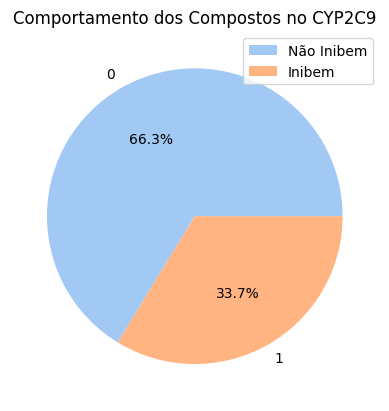

In [140]:
counts = df_cyp2c9['Y'].value_counts()
colours = sns.color_palette("pastel")[0:2]
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', colors=colours)


plt.title('Comportamento dos Compostos no CYP2C9')
plt.legend(["Não Inibem","Inibem"])
plt.show()

**Conclusão** : Pelo gráfico conseguimos perceber que há mais compostos que não inibem a enzima cyp2c9 (66.3%) do que os que inibem (33.7%)

De seguida, apresentam-se gráficos para uma análise da distribuição das variáveis numéricas em estudo:

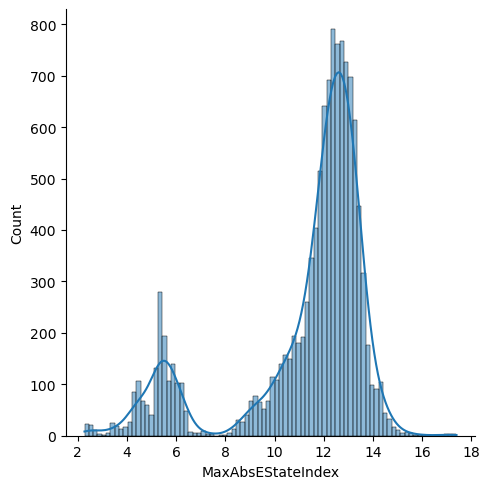

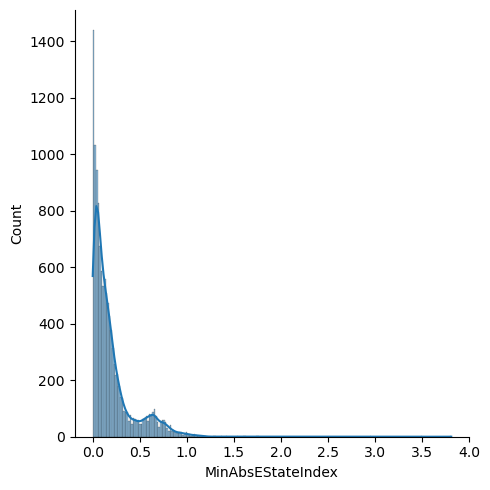

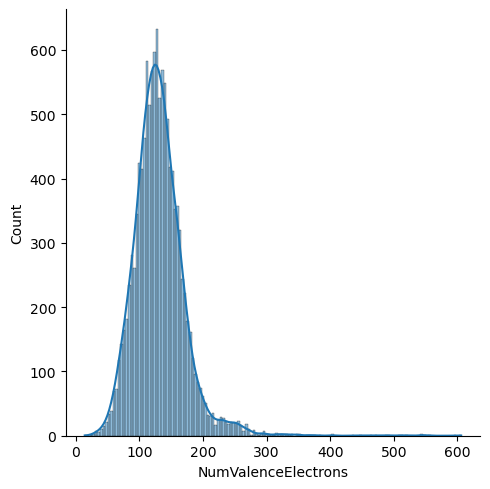

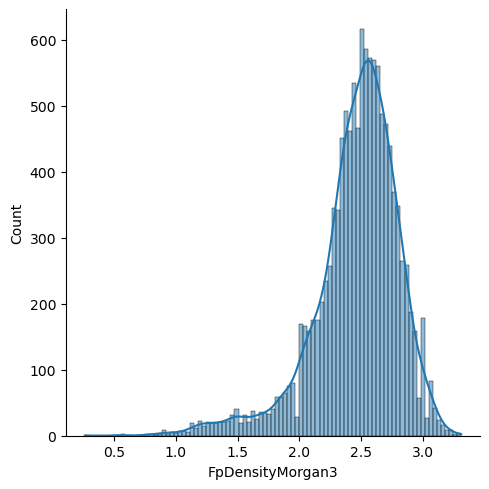

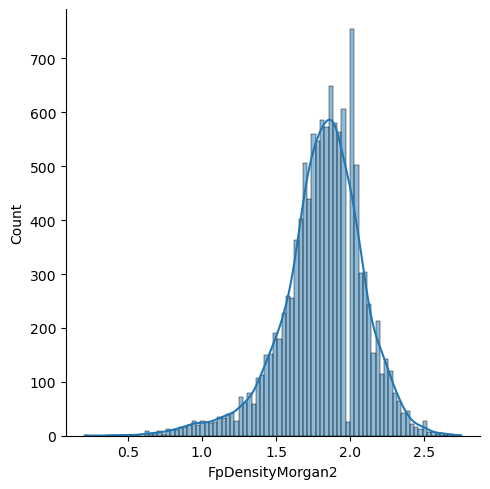

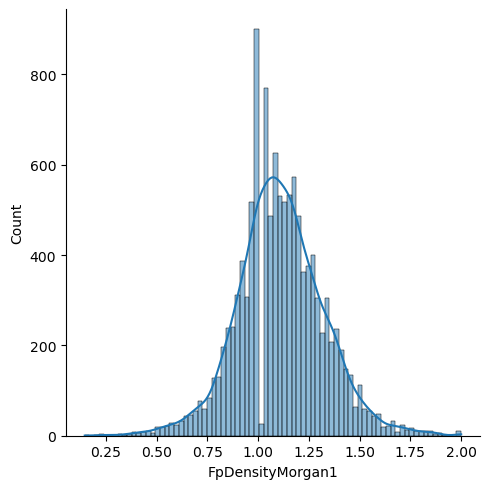

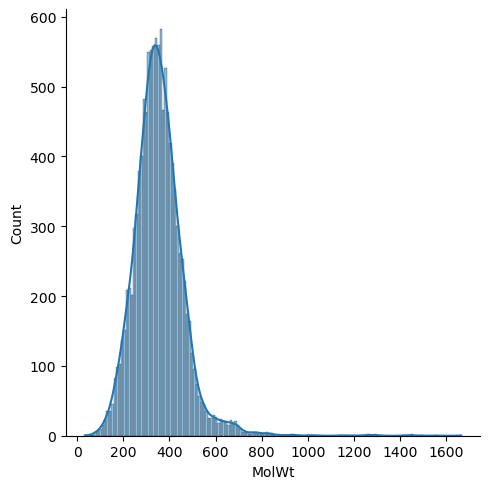

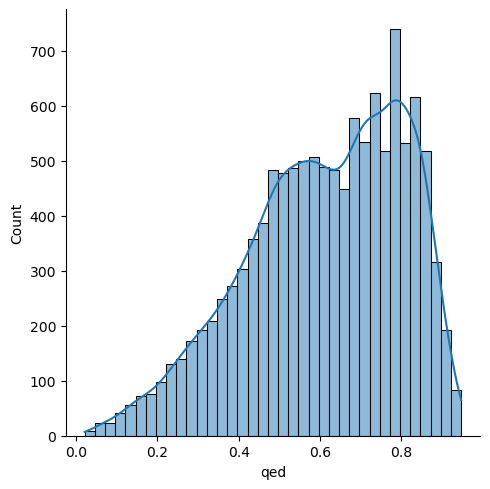

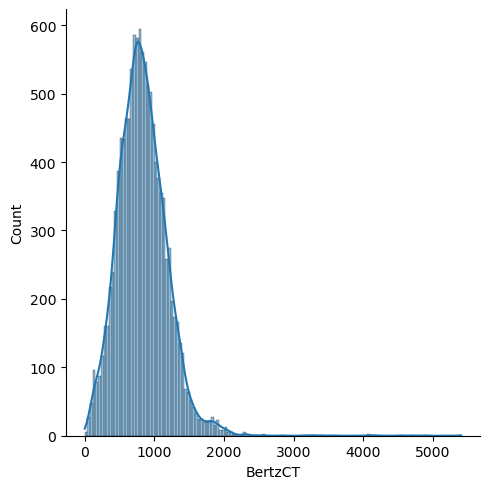

In [5]:
l = ["MaxAbsEStateIndex","MinAbsEStateIndex","NumValenceElectrons","FpDensityMorgan3","FpDensityMorgan2","FpDensityMorgan1","MolWt","qed","BertzCT"]
for col in l:
    sns.displot(df[col], kde=True)
    plt.show()


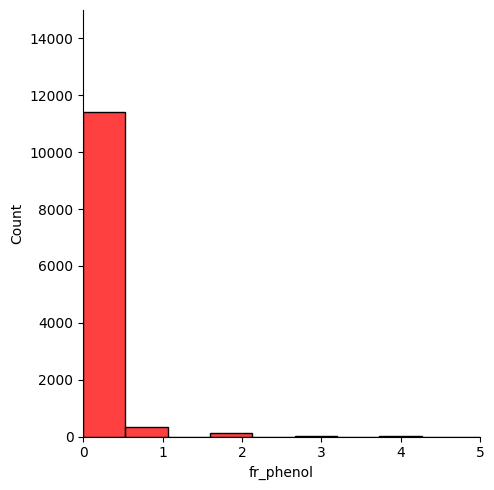

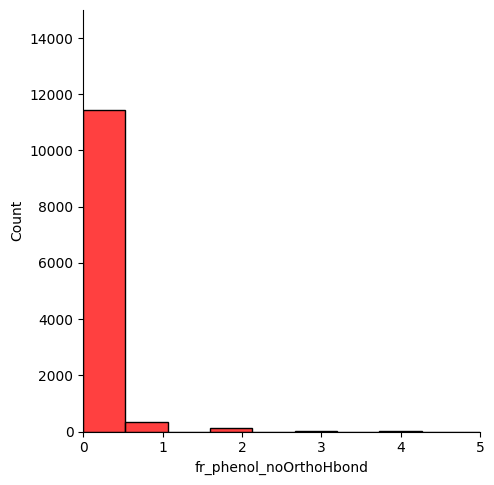

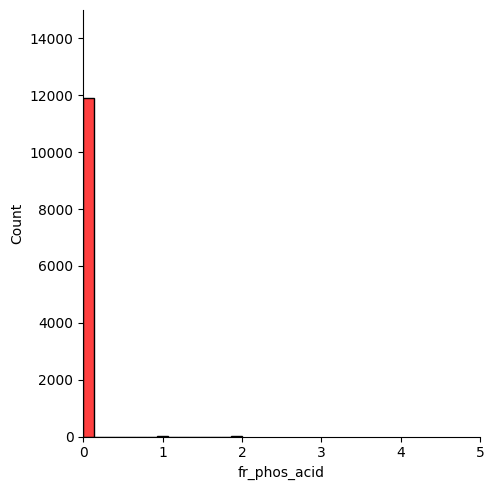

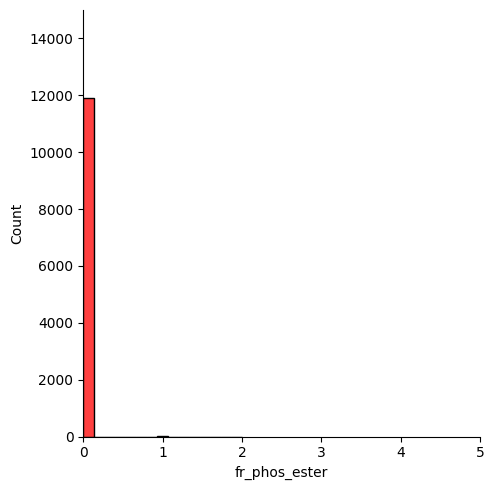

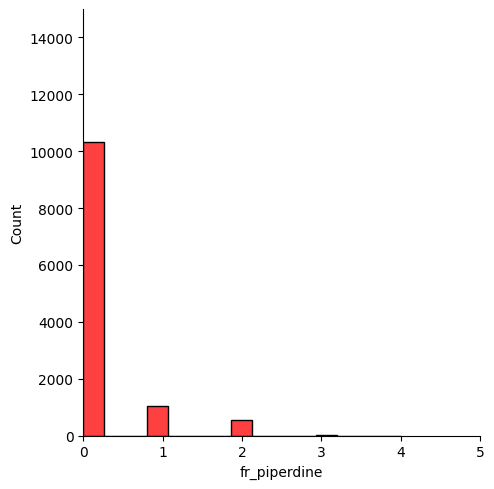

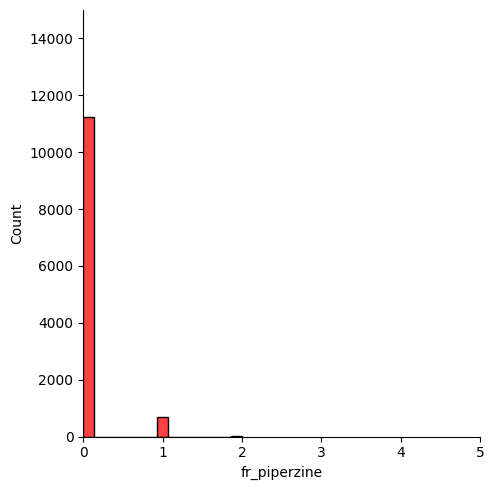

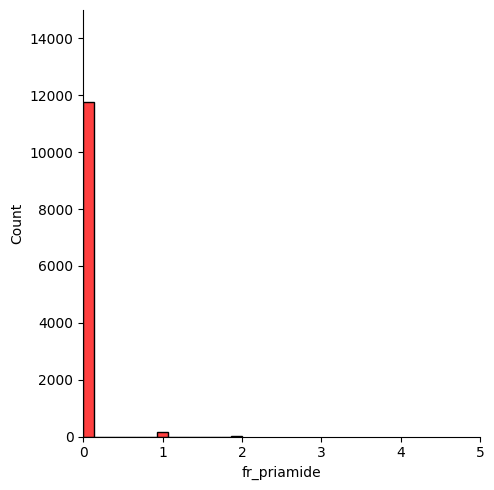

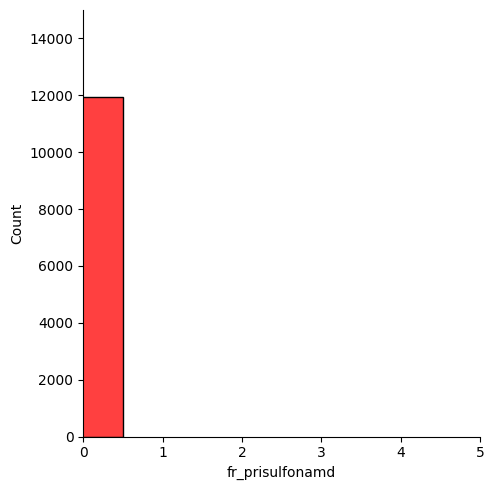

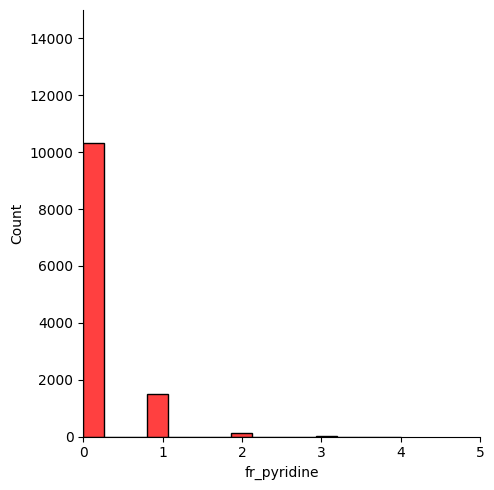

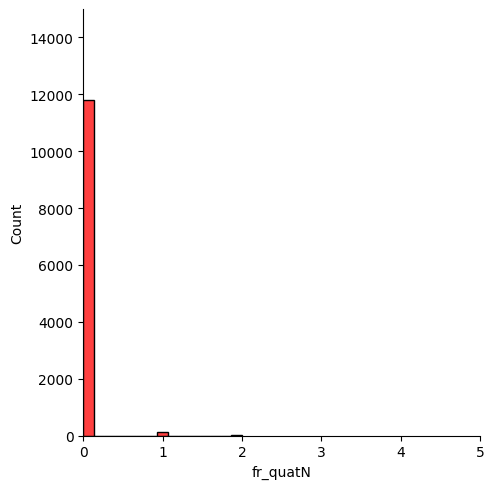

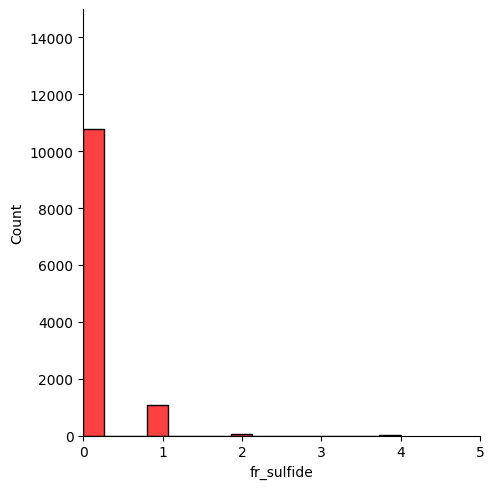

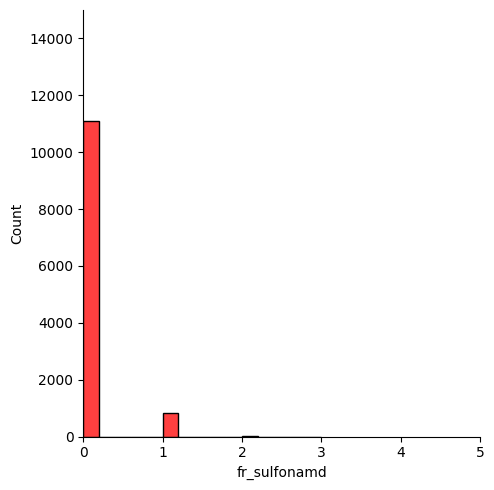

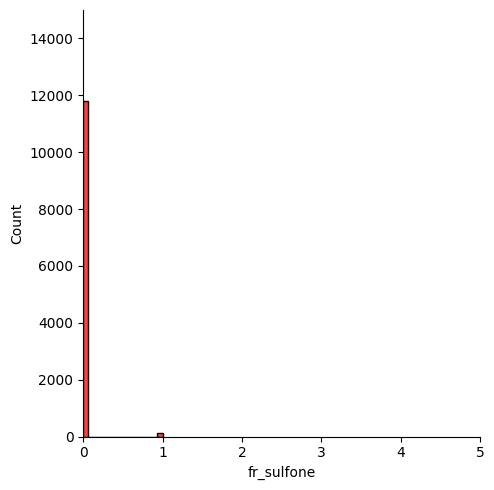

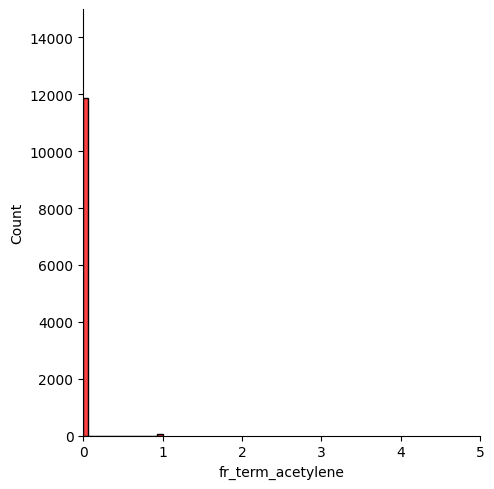

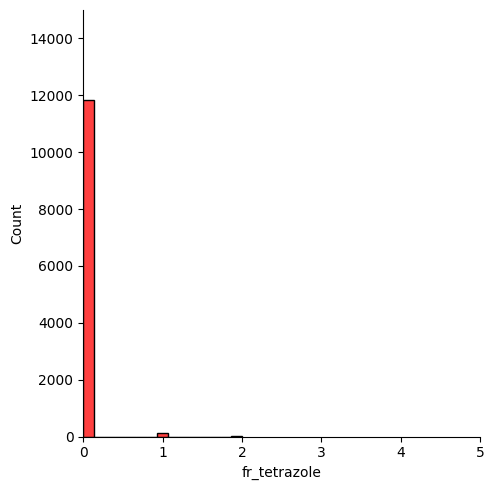

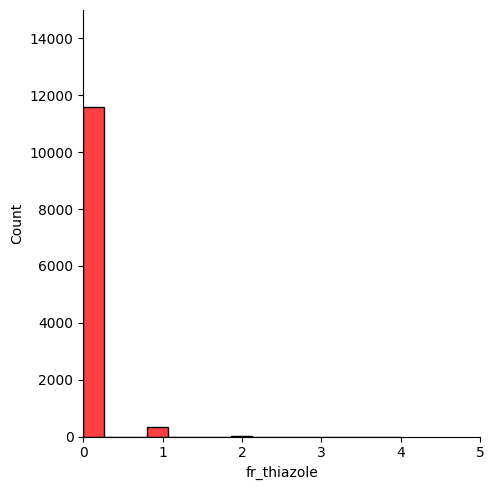

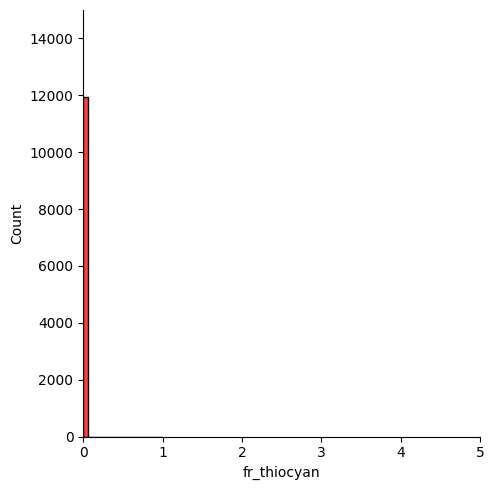

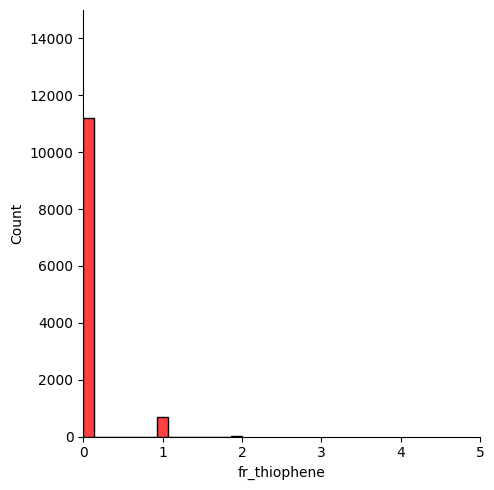

In [142]:
import matplotlib.ticker as ticker

for col in df.select_dtypes(include=np.number).columns[190:208]:
    g = sns.displot(df[col], kde=False, color='red')
    g.set(ylim=(0, 15000))
    g.set(xlim=(0,5))   
    g.ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.show()

# 5.  Análise estatística univariada

Para a análise estatística univariada, podemos ainda usar testes estatísticos para identificar compostos com características diferentes em relação à variável 'Y'. Como Y é uma variável binária, podemos usar o teste t de Student para comparar as médias das variáveis independentes entre as duas classes de Y.

### Testes Estatísticos

**H0:** Não há diferenças significativas entre o descritor químico em estudo e a presença de inibição da enzima CYP2C9.


**H1:** Há diferenças significativas entre descritor químico em estudo e a presença de inibição da enzima CYP2C9.

In [143]:
# T-test geral

descritores = df.iloc[:, 3:126:]

S=[]
NS=[]
for x, t in enumerate(descritores):
    not_inibited = df[df['Y'] == 0][t]
    inibited = df[df['Y'] == 1][t]
    p_value = ttest_ind(not_inibited, inibited)[1]
    if p_value < 0.05:
        S.append(t)
    else:
        NS.append(t)

print(f"Número de descritores químicos que apresentam diferenças significativas na inibição da enzima: {len(S)}")
print(f"Número de descritores químicos que não apresentam diferenças significativas na inibição da enzima: {len(NS)}")
print(f"Lista de descritores químicos que apresentam diferenças significativas na inibição da enzima: {S}")
print(f"Lista de descritores químicos que não apresentam diferenças significativas na inibição da enzima: {NS} ")

Número de descritores químicos que apresentam diferenças significativas na inibição da enzima: 107
Número de descritores químicos que não apresentam diferenças significativas na inibição da enzima: 16
Lista de descritores químicos que apresentam diferenças significativas na inibição da enzima: ['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'MaxPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA11', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SM

##### **Qed**

In [144]:
med_inhib = df[df["Y"] == 1]["qed"]
med_not_inhib = df[df["Y"] == 0]["qed"]
ttest_ind(med_inhib, med_not_inhib)


Ttest_indResult(statistic=-16.600203456391156, pvalue=3.366466874219499e-61)

**Conclusão:** Como a estatistica é de 16.6 e o valor-p é menor que 0.05 (p-value = 3.37e-611.05e-95), a hipótese nula é rejeitada portanto, podemos concluir que há diferenças significativas entre os valores de qed para os compostos com e sem inibição.

##### **BertzCT**

In [145]:
med_inhib = df[df["Y"] == 1]["BertzCT"]
med_not_inhib = df[df["Y"] == 0]["BertzCT"]
ttest_ind(med_inhib, med_not_inhib)

Ttest_indResult(statistic=35.581607824922585, pvalue=1.2079120315509517e-263)

**Conclusão:** Como a estatistica é de 35.58 e o valor-p é menor que 0.05 (p-value = 1.21e-263), a hipótese nula é rejeitada portanto, podemos concluir que há diferenças significativas entre os valores de BertzCT para os compostos com e sem inibição.

##### **FpDensityMorgan3**

In [146]:
med_inhib = df[df["Y"] == 1]["FpDensityMorgan3"]
med_not_inhib = df[df["Y"] == 0]["FpDensityMorgan3"]
ttest_ind(med_inhib, med_not_inhib)

Ttest_indResult(statistic=-0.04940446432587252, pvalue=0.9605977973988798)

**Conclusão:** Como a estatistica é de 0.049 e o valor-p é menor que 0.05 (p-value = 0.96), a hipótese nula não é rejeitada portanto, podemos concluir que não há diferenças significativas entre os valores de FpDensityMorgan3 para os compostos com e sem inibição.

##### **MinAbsEStateIndex**

In [147]:
med_inhib = df[df["Y"] == 1]["MinAbsEStateIndex"]
med_not_inhib = df[df["Y"] == 0]["MinAbsEStateIndex"]
ttest_ind(med_inhib, med_not_inhib)

Ttest_indResult(statistic=-12.4565577597981, pvalue=2.1377206519735e-35)

**Conclusão:** Como a estatistica é de -12.46 e o valor-p é menor que 0.05 (p-value = 2.14e-35), a hipótese nula é rejeitada portanto, podemos concluir que há diferenças significativas entre os valores de MinAbsEStateIndex para os compostos com e sem inibição.

##### **MaxAbsEStateIndex**

In [148]:
med_inhib = df[df["Y"] == 1]["MaxAbsEStateIndex"]
med_not_inhib = df[df["Y"] == 0]["MaxAbsEStateIndex"]
ttest_ind(med_inhib, med_not_inhib)

Ttest_indResult(statistic=20.94654931453465, pvalue=1.0532128801057078e-95)

**Conclusão:** Como a estatistica é de 20.95 e o valor-p é menor que 0.05 (p-value = 1.05e-95), a hipótese nula é rejeitada portanto, podemos concluir que há diferenças significativas entre os valores de MaxAbsEStateIndex para os compostos com e sem inibição.

##### **MolWt**

In [149]:
med_inhib = df[df["Y"] == 1]["MolWt"]
med_not_inhib = df[df["Y"] == 0]["MolWt"]
ttest_ind(med_inhib, med_not_inhib)


Ttest_indResult(statistic=25.98903245803305, pvalue=6.786164710564847e-145)

**Conclusão:** Como a estatistica é de 25.90 e o valor-p é menor que 0.05 (p-value = 6.79e-145), a hipótese nula é rejeitada portanto, podemos concluir que há diferenças significativas entre os valores de MolWt para os compostos com e sem inibição.

##### **NumValenceElectrons**

In [150]:
med_inhib = df[df["Y"] == 1]["NumValenceElectrons"]
med_not_inhib = df[df["Y"] == 0]["NumValenceElectrons"]
ttest_ind(med_inhib, med_not_inhib)


Ttest_indResult(statistic=19.978910057061732, pvalue=2.2378971679479476e-87)

**Conclusão:** Como a estatistica é de 19.98 e o valor-p é menor que 0.05 (p-value = 2.24e-87), a hipótese nula é rejeitada portanto, podemos concluir que há diferenças significativas entre os valores de NumValenceElectrons para os compostos com e sem inibição.

**H0:** O descritor químico tem expressão diferencial significativa

**H1:** O descritor químico não tem expressão diferencial significativa

### Teste do Qui-Quadrado

**H0:** A quantidade de grupos funcionais em cada composto influência na inibição do gene CYP2C9.


**H1:** A quantidade de  grupos funcionais em cada composto não influência na inibição do gene CYP2C9.

In [151]:
import scipy.stats
from scipy.stats import chi2
compostos = df.iloc[:, 126:]
compostos1 = compostos.insert(loc = 0,
          column = 'Y',
          value = df["Y"])
S = []
NS = []

for x, y in enumerate(compostos):
    a = pd.crosstab(compostos["Y"],compostos[y])
    b = scipy.stats.chi2_contingency(a)[1]
    if b > 0.05:
        NS.append(y)
    else:
        S.append(y)
S.pop(0) 

print(f"Número de grupos funcionais que apresentam diferenças significativas na inibição da enzima: {len(S)}")
print(f"Número de grupos funcionais que não apresentam diferenças significativas na inibição da enzima: {len(NS)}")
print(f"Lista de grupos funcionais que apresentam diferenças significativas na inibição da enzima: {S}")
print(f"Lista de grupos funcionais que não apresentam diferenças significativas na inibição da enzima: {NS} ")

Número de grupos funcionais que apresentam diferenças significativas na inibição da enzima: 66
Número de grupos funcionais que não apresentam diferenças significativas na inibição da enzima: 19
Lista de grupos funcionais que apresentam diferenças significativas na inibição da enzima: ['fr_Al_COO', 'fr_Al_OH', 'fr_Al_OH_noTert', 'fr_ArN', 'fr_Ar_COO', 'fr_Ar_N', 'fr_Ar_NH', 'fr_COO', 'fr_COO2', 'fr_C_O', 'fr_C_O_noCOO', 'fr_C_S', 'fr_HOCCN', 'fr_Imine', 'fr_NH0', 'fr_NH1', 'fr_NH2', 'fr_N_O', 'fr_Ndealkylation1', 'fr_Ndealkylation2', 'fr_Nhpyrrole', 'fr_alkyl_carbamate', 'fr_alkyl_halide', 'fr_allylic_oxid', 'fr_amide', 'fr_aniline', 'fr_aryl_methyl', 'fr_benzene', 'fr_bicyclic', 'fr_dihydropyridine', 'fr_epoxide', 'fr_ester', 'fr_ether', 'fr_furan', 'fr_guanido', 'fr_halogen', 'fr_hdrzone', 'fr_imidazole', 'fr_imide', 'fr_ketone', 'fr_ketone_Topliss', 'fr_lactam', 'fr_lactone', 'fr_methoxy', 'fr_morpholine', 'fr_nitrile', 'fr_nitro', 'fr_nitro_arom', 'fr_nitro_arom_nonortho', 'fr_oxazo

**Conclusão** : Segundo a análise estatística anterior conseguímos concluir que existem 66 grupos funcionais que influenciam significativamente para um nivel de significância para 0.05 a inibição do gene CYP2C9 e 19 grupos funcionais não influenciam significativamente para um nivel de significância para 0.05 a inibição do gene CYP2C9. 

Podemos por fim avaliar a correlação entre os descritores químicos escolhidos,  gerarando uma matriz de correlação:

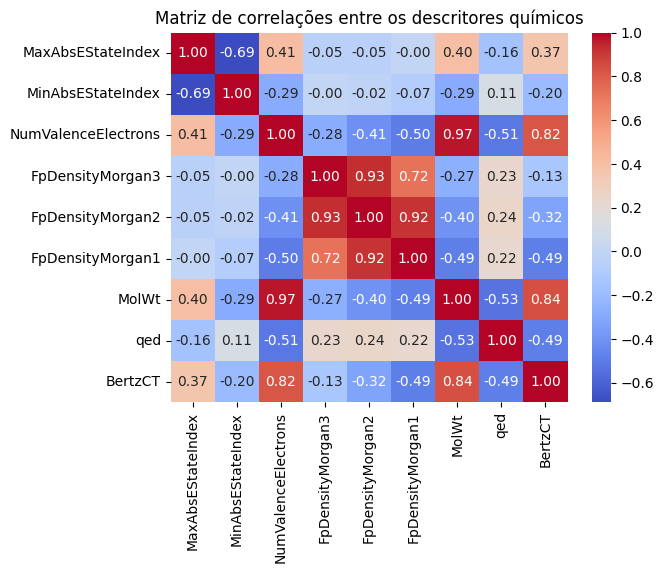

In [152]:
sns.heatmap(df[l].corr(), cmap='coolwarm', annot= True, fmt=".2f")
plt.title('Matriz de correlações entre os descritores químicos')
plt.show()

# 6. - Análise estatística multivariada (não supervisionada): clustering, redução de dimensionalidade/ visualização

Para começar o último tópico começamos por retirar colunas desnecessáriaS para esta análise nomeadamente a variável categórica "smiles" e os "ids".


In [153]:
df_1 = df.drop(['ids', 'smiles', 'Y'], axis=1)
df_1 = df_1.drop(df_1.iloc[:, 123:], axis=1)
df_1

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR
0,12.820479,-0.183140,12.820479,0.128619,0.457873,362.476,344.332,362.07590,126.0,0.0,...,5.0,0.0,7.0,5.0,0.0,1.0,1.0,3.0,2.66100,99.7840
1,6.126257,0.660427,6.126257,0.660427,0.756902,255.708,245.628,255.05632,88.0,0.0,...,2.0,1.0,4.0,2.0,0.0,0.0,0.0,3.0,3.79210,72.2647
2,5.719940,-0.219974,5.719940,0.075509,0.605920,421.549,390.301,421.25900,164.0,0.0,...,8.0,0.0,8.0,6.0,0.0,1.0,1.0,4.0,2.73890,118.7370
3,12.040634,-0.208718,12.040634,0.006714,0.728361,324.344,308.216,324.13348,122.0,0.0,...,7.0,1.0,8.0,6.0,0.0,0.0,0.0,3.0,1.06010,85.8887
4,13.082813,-0.044883,13.082813,0.018472,0.457249,495.628,458.332,495.29578,194.0,0.0,...,9.0,1.0,10.0,10.0,0.0,2.0,2.0,5.0,2.28752,136.7977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,12.346902,-0.801800,12.346902,0.024123,0.682518,263.293,246.157,263.11575,102.0,0.0,...,4.0,1.0,5.0,1.0,1.0,1.0,2.0,3.0,0.13350,65.7418
11930,9.674588,-0.801690,9.674588,0.174259,0.635371,210.229,196.117,210.08920,82.0,0.0,...,4.0,1.0,4.0,1.0,0.0,2.0,2.0,3.0,0.37390,52.1998
11931,13.390758,-1.019880,13.390758,0.162294,0.455270,397.427,374.243,397.15253,152.0,0.0,...,6.0,1.0,7.0,2.0,1.0,3.0,4.0,6.0,1.00920,99.0888
11932,13.179767,-1.161112,13.179767,0.077392,0.772281,357.406,334.222,357.15762,138.0,0.0,...,5.0,2.0,6.0,2.0,2.0,1.0,3.0,4.0,1.06960,91.5416


Posteriormente procedemos á padronização dos dados númericos para que estes tenham média zero e desvio padrão 1

In [154]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_1)
df_scaled

array([[ 0.57470029,  0.48253239,  0.57470029, ..., -0.12146359,
        -0.14705449,  0.1342937 ],
       [-1.91429792,  1.06716821, -1.91429792, ..., -0.12146359,
         0.47438237, -0.81980567],
       [-2.06537174,  0.45700395, -2.06537174, ...,  0.6022241 ,
        -0.1042555 ,  0.79139782],
       ...,
       [ 0.78673737, -0.09737207,  0.78673737, ...,  2.04959948,
        -1.05456877,  0.11019099],
       [ 0.7082882 , -0.19525339,  0.7082882 , ...,  0.6022241 ,
        -1.02138445, -0.15147188],
       [-0.20794688,  0.27620809, -0.20794688, ..., -1.56883897,
        -1.07681985, -1.19816839]])

### 6.1 Redução da Dimensionalidade (PCA):

In [155]:
componentes = 2     
for x in range(2,50):
    pca = PCA(n_components=x)
    pca.fit(df_scaled)
    reduced = pca.transform(df_scaled)
    if (sum(pca.explained_variance_ratio_)) > 0.7:
        break
    componentes +=1

print(f"Número de componentes que explicam 70% dos dados: {componentes}")

Número de componentes que explicam 70% dos dados: 11


In [156]:
pca = PCA(n_components=11)
df_pca = pca.fit_transform(df_scaled)
df_pca

array([[ 0.20644811,  0.86789915, -0.07667133, ..., -0.31775175,
         2.71260334,  0.77677834],
       [-7.2404753 , -5.0375108 , -1.28743737, ...,  2.52937573,
         0.95291379,  2.82211679],
       [ 3.45785287, -1.46308958, -4.107288  , ..., -1.22356682,
        -1.04902959,  0.32884449],
       ...,
       [ 5.90686489,  6.17287679, -3.16389072, ...,  2.21418249,
         2.72344114,  0.51094739],
       [ 3.5585227 ,  6.30768239, -2.40031708, ...,  0.42058129,
         2.45489542,  0.43906322],
       [-6.3239353 ,  3.05493284,  3.37004078, ..., -2.38919723,
        -1.75611946, -0.03903526]])

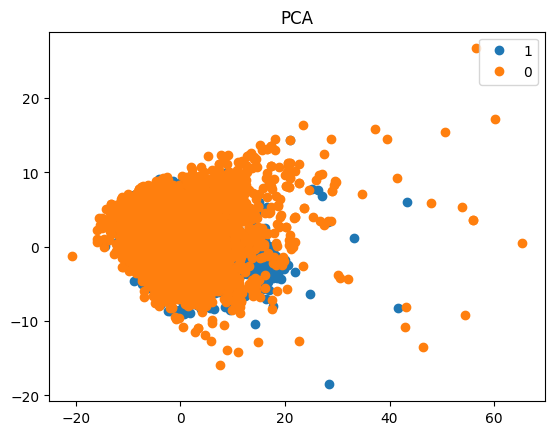

In [157]:
for inib in df['Y'].unique():
    ini = df.index[df['Y']==inib]-1
    plt.plot(df_pca[ini,0],df_pca[ini,1], 'o' , label=inib)
plt.title("PCA")
plt.legend(loc='best', shadow=False)
plt.show()

Uma vez que não conseguimos denotar uma diferença na distribuição dos pontos segundo as duas classes não conseguimos tirar muitas conclusões desta análise sendo por isso melhor explorar outras técnicas.

TSNE

O TSNE é um algoritmo de redução de dimensionalidade alternativo ao PCA

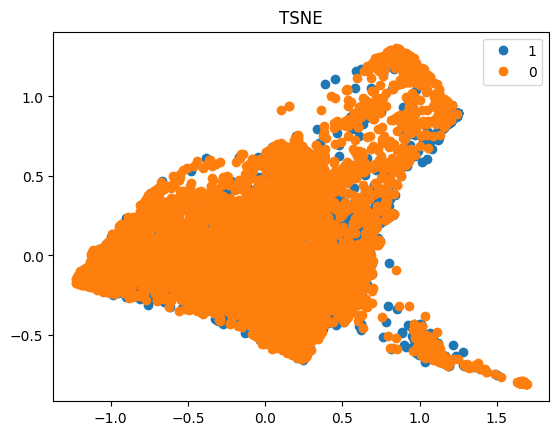

In [158]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter= 250)
points = tsne.fit_transform(df_scaled)

for inib in df['Y'].unique():
    ini = df.index[df['Y']==inib]-1
    plt.plot(points[ini,0],points[ini,1], 'o' , label=inib)
plt.title("TSNE")
plt.legend(loc='best', shadow=False)
plt.show()

Uma vez que não conseguimos denotar uma diferença na distribuição dos pontos segundo as duas classes não conseguimos tirar muitas conclusões desta análise sendo por isso melhor explorar outras técnicas.

Uma vez que, ambas as técnicas de redução de dimensionalidade não resultaram numa separação distinta dos pontos, para a análise de machine learning iremos utilizar os dados sem ser reduzidos de forma a não perder informações importantes que possam limitar o desempenho dos modelos. Embora alguns modelos mais complexos sejam capazes de trabalhar com este tipo de distribuição.

### 6.2. K-means Clustering

Determinação do k

/home/sa_bruno/anaconda3/envs/mestrado_final/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sa_bruno/anaconda3/envs/mestrado_final/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sa_bruno/anaconda3/envs/mestrado_final/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sa_bruno/anaconda3/envs/mestrado_final/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

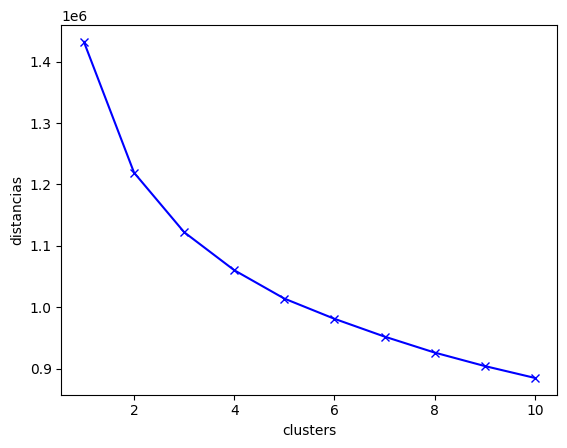

In [159]:
from sklearn.cluster import KMeans
k_values = range(1, 11)
lista = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=43)
    kmeans.fit(df_scaled)
    lista.append(kmeans.inertia_)
plt.plot(k_values, lista, 'bx-')
plt.xlabel('clusters')
plt.ylabel('distancias')
plt.show()

In [160]:
from sklearn.cluster import KMeans   
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_coefficients.append((score, k))

/home/sa_bruno/anaconda3/envs/mestrado_final/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/home/sa_bruno/anaconda3/envs/mestrado_final/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sa_bruno/anaconda3/envs/mestrado_final/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sa_bruno/anaconda3/envs/mestrado_final/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sa_bruno/anaconda3/envs/mestrado_final/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

In [161]:
silhouette_coefficients

[(0.15575210223333774, 2),
 (0.11198407401479493, 3),
 (0.1067436870524692, 4),
 (0.0932288214513314, 5),
 (0.09540601062259278, 6),
 (0.09441148443562285, 7),
 (0.08194312846007092, 8),
 (0.08327435859793725, 9),
 (0.08625784779292237, 10)]

**Conclusão**: De acordo com as análises feitas anteriormente, determinamos um valor de k=2, no entanto estes métodos não são exatos, sendo apenas uma aproximação.

In [162]:
k=2   
km1 = KMeans(n_clusters=k, max_iter=1000)
km1.fit(df_scaled)
labels=km1.predict(df_scaled)
centroids=km1.cluster_centers_

pd.crosstab(labels, df["Y"], rownames=["clusters"])

/home/sa_bruno/anaconda3/envs/mestrado_final/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Y,0,1
clusters,,
0,5309,2032
1,2600,1993


**Conclusão**: Através das análises das diferentes analises de PCA e K-means clustering, é possível concluir que  

Visualização

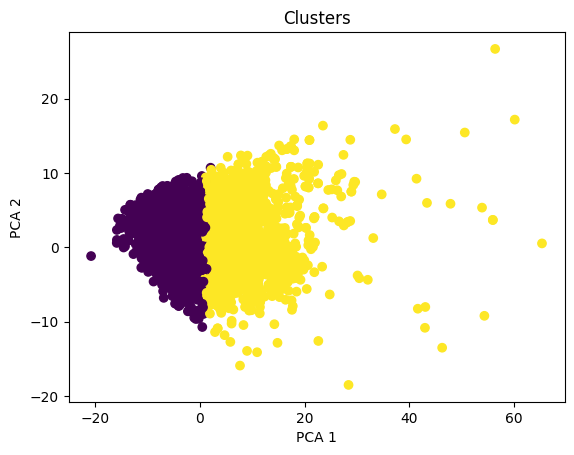

In [163]:
plt.scatter(df_pca[:,0], df_pca[:,1], c=labels, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clusters')
plt.show()


O gráfico em cima representado mostra uma separação clara relativa aos dois clusters. É também de notar a presença de alguns outliers relativos ao segundo cluster.

In [183]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage


In [190]:
d = pdist(df[l], metric= "cityblock") 
Z = linkage(d, method="complete")

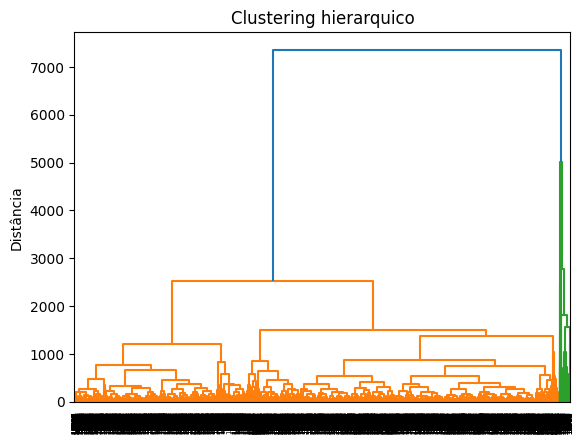

In [191]:
dendrogram(Z)
plt.title("Clustering hierarquico")
plt.ylabel("Distância")

ax = plt.gca()
plt.show()


# 7 Machine-learning

As variáveis escolhidas para análise de machine learning foram aquelas que considerámos ter mais significado biológico, excetuando aquelas que apresentavam um coeficiente de correlação elevado (FpDensityMorgan2, FpDensityMorgan3) como podemos constatar pelo heatmap realizado anteriormente. Adicionalmente foi adicionado ao dataset a variável a testar [Y] - (Com ou sem inibição).

In [6]:
l.remove("FpDensityMorgan2")
l.remove("FpDensityMorgan3")
l.append("Y")

In [7]:
df[l]

,MaxAbsEStateIndex,MinAbsEStateIndex,NumValenceElectrons,FpDensityMorgan1,MolWt,qed,BertzCT,Y
0,12.820479,0.128619,126.0,1.166667,362.476,0.457873,745.10614,1
1,6.126257,0.660427,88.0,0.888889,255.708,0.756902,661.56570,1
2,5.719940,0.075509,164.0,1.000000,421.549,0.605920,974.84500,1
3,12.040634,0.006714,122.0,1.208333,324.344,0.728361,818.19965,1
4,13.082813,0.018472,194.0,1.222222,495.628,0.457249,1197.71120,0
...,...,...,...,...,...,...,...,...
11929,12.346902,0.024123,102.0,1.210526,263.293,0.682518,483.83765,0
11930,9.674588,0.174259,82.0,1.466667,210.229,0.635371,316.54962,0
11931,13.390758,0.162294,152.0,1.068966,397.427,0.455270,891.82336,0
11932,13.179767,0.077392,138.0,1.000000,357.406,0.772281,747.82825,0


De forma a realizar os diferentes métodos de machine learning foram criados 4 datasets para o treino dos nossos modelos, sendo que usamos uma percentagem de 70% para treino e 30% para teste.

In [8]:
from sklearn.model_selection import train_test_split

X = df[l].drop(['Y'],axis=1)
y = df[l]['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8353, 7), (3581, 7), (8353,), (3581,))

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_auc_score,mean_squared_error
from math import sqrt
random_classifier = RandomForestClassifier()

random_classifier.fit(X_train, y_train)
preds = random_classifier.predict(X_test)
print("Matriz de confusão:")
print(confusion_matrix(y_test, preds, labels=[0,1]))
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
auc_roc = roc_auc_score(y_test, preds)
mean_error = mean_squared_error(y_test, preds)  
root_mean = sqrt(mean_error) 

precisoes.append(accuracy)
modelos.append("Random Forest")


print()
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)
print("Raiz quadrada do erro:", root_mean)

Matriz de confusão:
[[2065  325]
 [ 561  630]]

Accuracy: 0.7525830773526948
Precision: 0.6596858638743456
Recall: 0.5289672544080605
F1-score: 0.587138863000932
AUC-ROC: 0.6964919954048671
Raiz quadrada do erro: 0.4974102156644003


In [11]:
precisoes = []
modelos = [] 

De seguida vamos testar vários modelos:

## RandomForest

Random Forest é um algoritmo de machine learning que utiliza um conjunto de árvores de decisão para realizar classificação ou regressão. A principal ideia por trás do Random Forest é combinar as previsões de várias árvores de decisão para obter um resultado final mais robusto e preciso.

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_auc_score,mean_squared_error
from math import sqrt
random_classifier = RandomForestClassifier()

random_classifier.fit(X_train, y_train)
preds = random_classifier.predict(X_test)
print("Matriz de confusão:")
print(confusion_matrix(y_test, preds, labels=[0,1]))
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
auc_roc = roc_auc_score(y_test, preds)
mean_error = mean_squared_error(y_test, preds)  
root_mean = sqrt(mean_error) 

precisoes.append(accuracy)
modelos.append("Random Forest")


print()
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)
print("Raiz quadrada do erro:", root_mean)

Matriz de confusão:
[[2088  302]
 [ 568  623]]

Accuracy: 0.7570511030438425
Precision: 0.6735135135135135
Recall: 0.5230898404701931
F1-score: 0.5888468809073725
AUC-ROC: 0.698365003917105
Raiz quadrada do erro: 0.4928984651590604


A matriz de confusão obtida revela 2088 verdadeiros negativos, 568 falsos negativos, 302 falsos positivos e 623 verdadeiros positivos. Relativamente às métricas de desempenho, vale realçar que a precisão (accuracy) obtida para o modelo foi de aproxidamente 76%, indicando um bom nível de precisão do modelo.

## Importância das variáveis do RandomForest


              Variável  Importancia
0    MaxAbsEStateIndex     0.157881
1    MinAbsEStateIndex     0.123930
2  NumValenceElectrons     0.117641
3     FpDensityMorgan1     0.108050
4                MolWt     0.166825
5                  qed     0.142928
6              BertzCT     0.182745


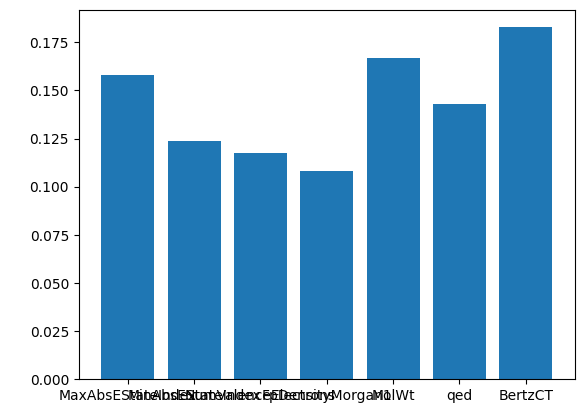

In [169]:
import matplotlib.pyplot as plt
importancias = random_classifier.feature_importances_
df_impor = pd.DataFrame({'Variável': X.columns, 'Importância': importancias})
print(df_impor)

#df_impor = df.Importancia.sort_values(ascending = False)
plt.bar(df_impor['Variável'], df_impor['Importância'])
plt.ylabel(" ")

plt.show()

De acordo com a figura a cima, as variáveis BertzCT e MolWT são as que têm mais influência no processo de decisão deste modelo.

# SVC

In [170]:
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
import math

svm_classifier = SVC(kernel="linear")
svm_classifier.fit(X_train, y_train)
pred = svm_classifier.predict(X_test)
ac = accuracy_score(y_test, pred)

In [171]:
print(f"Presicão do modelo {(ac)}")
precisoes.append(ac)
modelos.append("SVC")

Presicão do modelo 0.7104160848924881


## Redes Neuronais

In [172]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
import math

mlp_class = MLPClassifier()

mlp_class.fit(X_train, y_train)

preds = mlp_class.predict(X_test)

print("Matriz de confusão:")
print(confusion_matrix(y_test, preds, labels=[0,1]))
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
auc_roc = roc_auc_score(y_test, preds)
mean_error = mean_squared_error(y_test, preds)  
root_mean = sqrt(mean_error)


precisoes.append(accuracy)
modelos.append("Redes Neuronais")


mean_error = mean_squared_error(y_test, preds)
root_mean = math.sqrt(mean_error)
root_mean

print()
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)
print("Raiz quadrada do erro:", root_mean)

Matriz de confusão:
[[2209  181]
 [ 854  337]]

Accuracy: 0.7109745881038816
Precision: 0.6505791505791506
Recall: 0.28295549958018473
F1-score: 0.39438267992978354
AUC-ROC: 0.6036116410034814
Raiz quadrada do erro: 0.5376108368477317


A matriz de confusão obtida revela 1506 verdadeiros negativos, 288 falsos negativos, 884 falsos positivos e 903 verdadeiros positivos. Relativamente às métricas de desempenho, vale realçar que a precisão (accuracy) obtida para o modelo foi de aproxidamente 69%, indicando um bom nível de precisão do modelo.

In [173]:

import eli5
from eli5.sklearn import PermutationImportance


perm_importance = PermutationImportance(mlp_class, random_state=42).fit(X_test, y_test)


eli5.show_weights(perm_importance, feature_names=mlp_class.feature_names_in_)


Weight,Feature
0.0954 ± 0.0132,MolWt
0.0866 ± 0.0106,NumValenceElectrons
0.0530 ± 0.0099,BertzCT
0.0028 ± 0.0035,qed
0.0018 ± 0.0017,MaxAbsEStateIndex
0.0016 ± 0.0024,MinAbsEStateIndex
0.0015 ± 0.0021,FpDensityMorgan1


## KNeighbors

K-Nearest Neighbors (KNN) é um algoritmo de machine learning utilizado para problemas de classificação e regressão. No caso da classificação, o KNN determina a classe de um ponto de dados de teste encontrando os k vizinhos mais próximos desse ponto e atribuindo a classe mais comum entre esses vizinhos ao ponto de teste. A distância entre os pontos é geralmente calculada usando a distância Euclidiana. O valor de k, determinado antecipadamente, define quantos vizinhos são considerados.

In [174]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
import math

knn_class = KNeighborsClassifier()

knn_class.fit(X_train, y_train)

preds = knn_class.predict(X_test)

print("Matriz de confusão:")
print(confusion_matrix(y_test, preds, labels=[0,1]))

accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
auc_roc = roc_auc_score(y_test, preds)
mean_error = mean_squared_error(y_test, preds)  
root_mean = sqrt(mean_error)

precisoes.append(accuracy)
modelos.append("KNN")


mean_error = mean_squared_error(y_test, preds)
root_mean = math.sqrt(mean_error)
root_mean
print()
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)
print("Raiz quadrada do erro:", root_mean)

Matriz de confusão:
[[1952  438]
 [ 635  556]]

Accuracy: 0.7003630270874057
Precision: 0.5593561368209256
Recall: 0.46683459277917716
F1-score: 0.5089244851258581
AUC-ROC: 0.6417854972264087
Raiz quadrada do erro: 0.5473910603148303


A matriz de confusão obtida revela 1952   verdadeiros negativos, 635   falsos negativos, 438 falsos positivos e 556 verdadeiros positivos. Relativamente às métricas de desempenho, vale realçar que a precisão (accuracy) obtida para o modelo foi de aproxidamente 70%, indicando um bom nível de precisão.

## NaivesBayes

O Naive Bayes Gaussian é um algoritmo de machine learning utilizado para classificação. Ele se baseia no Teorema de Bayes e assume que as features (características) do conjunto de dados seguem uma distribuição normal (gaussiana).
O Naive Bayes Gaussian é rápido e eficiente em termos computacionais, sendo especialmente adequado para conjuntos de dados com muitas features. 

In [177]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

naive_bayes = GaussianNB()

naive_bayes.fit(X_train, y_train)

preds = naive_bayes.predict(X_test)

print("Matriz de confusão:")
print(confusion_matrix(y_test, preds))

accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)

precisoes.append(accuracy)
modelos.append("Naive-Bayes")


auc_roc = roc_auc_score(y_test, preds)
mean_error = mean_squared_error(y_test, preds)  
root_mean = sqrt(mean_error)

print()
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)
print("Raiz quadrada do erro:", root_mean)

Matriz de confusão:
[[1549  841]
 [ 411  780]]

Accuracy: 0.6503769896676906
Precision: 0.4811844540407156
Recall: 0.654911838790932
F1-score: 0.5547652916073968
AUC-ROC: 0.6515144968013238
Raiz quadrada do erro: 0.5912892780461264


A matriz de confusão obtida revela 1549 verdadeiros negativos, 411 falsos negativos, 841 falsos positivos e 780 verdadeiros positivos. Relativamente às métricas de desempenho, vale realçar que a precisão (accuracy) obtida para o modelo foi de aproxidamente 65%, indicando um bom nível de precisão do modelo.

## DecisionTree

A árvore de decisão é um algoritmo de machine learning baseado numa estrutura de árvore onde cada nó representa uma decisão com base em uma feature específica. A partir do nó raiz, o algoritmo percorre os ramos da árvore fazendo decisões até chegar às folhas, que representam as classes ou valores de regressão finais. pode lidar com diferentes tipos de dados (numéricos e categóricos) e é menos suscetível a problemas de overfitting quando comparada a alguns outros algoritmos.

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
import math

decision_tree_class = DecisionTreeClassifier()

decision_tree_class.fit(X_train, y_train)

preds = decision_tree_class.predict(X_test)

print("Matriz de confusão:")
print(confusion_matrix(y_test, preds))

accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)

precisoes.append(accuracy)
modelos.append("Decision Tree")


auc_roc = roc_auc_score(y_test, preds)
mean_error = mean_squared_error(y_test, preds)  
root_mean = sqrt(mean_error)

print()
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)
print("Raiz quadrada do erro:", root_mean)

Matriz de confusão:
[[1824  566]
 [ 584  607]]

Accuracy: 0.6788606534487573
Precision: 0.5174765558397272
Recall: 0.5096557514693535
F1-score: 0.5135363790186125
AUC-ROC: 0.6364178338936725
Raiz quadrada do erro: 0.5666915797426698


A matriz de confusão obtida revela 1812 verdadeiros negativos, 599 falsos negativos, 578 falsos positivos e 592 verdadeiros positivos. Relativamente às métricas de desempenho, vale realçar que a precisão (accuracy) obtida para o modelo foi de aproxidamente 67%, indicando um bom nível de precisão do modelo.

Imprimir a árvore

In [13]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz
import graphviz
l.pop(-1)
dot=tree.export_graphviz(decision_tree_class, out_file="arvore1.dot", feature_names=l, class_names=str(y.unique()), label="all", rounded=True, filled=True)

### *Precisão dos diferentes modelos estudados*

In [179]:
from prettytable import PrettyTable
tabela = PrettyTable()
tabela.field_names = ['Modelo', "Precisão"]
for modelo, precisao in zip(modelos, precisoes):
    tabela.add_row([modelo, precisao])
print(tabela)


+-----------------+--------------------+
|      Modelo     |      Precisão      |
+-----------------+--------------------+
|  Random Forest  | 0.7553755934096621 |
|       SVC       | 0.7104160848924881 |
| Redes Neuronais | 0.7109745881038816 |
|       KNN       | 0.7003630270874057 |
|   Naive-Bayes   | 0.6503769896676906 |
|  Decision Tree  | 0.6824909243228149 |
+-----------------+--------------------+


Como é possível observar, o algoritmo com melhor desempenho foi o Random Forest.

# 8. Deep learning

Os algoritmos de deep learning usam uma estrutura em camadas de algoritmos chamada rede neural artificial . O design de uma rede neural artificial é inspirado na rede biológica de neuronios no cérebro humano, levando a um sistema de aprendizagem muito mais capaz do que os modelos padrão de machine learning.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()
model.add(Dense(12, input_shape=(7,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=150, batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train)
# print('Accuracy: %.2f' % (accuracy*100))
#accuracy

In [181]:
print(accuracy)
print(loss)

[0.5419900417327881, 0.7035795450210571]

O modelo é composto por três camadas: uma camada de entrada com 12 neurônios, uma camada oculta com 8 neurônios e uma camada de saída com um neurônio. A função de ativação 'relu' é utilizada nas camadas de entrada e oculta, enquanto a função de ativação 'sigmoid' é utilizada na camada de saída para realizar a classificação binária.

Após a construção do modelo, ele é compilado com a função de perda (loss) 'binary_crossentropy', que é adequada para problemas de classificação binária, e o otimizador 'adam' é utilizado para ajustar os pesos da rede durante o treino. A métrica de precisão é definida para avaliar o desempenho do modelo durante o treino. 

A função evaluate retorna 2 valores: o primeiro correspondente ao "loss value" (medida do quão bem as previsões do modelo coincidem com os valores reais durante o treino), e o segundo corresponde à precisão do modelo - 70%.
